<a href="https://colab.research.google.com/github/RedPanda54/Machine_Learning_study/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import seaborn as sns
URL = "https://raw.githubusercontent.com/RedPanda54/Machine_Learning_study/main/diabetes_prediction_dataset.csv"
df = pd.read_csv(URL)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [131]:
df.isnull().sum() # 결측치는 없다.

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [132]:
# 데이터 통계량 파악
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [133]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [134]:
df.diabetes.value_counts(normalize = True).mul(100)

0    91.5
1     8.5
Name: diabetes, dtype: float64

In [135]:
# 중복행 제거
df.drop_duplicates(inplace=True) # inplace는 원본을 제거할지 말지
df # 원본과 비교해보니 3854개의 행이 제거되었다.

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [136]:
pd.crosstab(df.gender, df.smoking_history, margins = True)

smoking_history,No Info,current,ever,former,never,not current,All
gender,,,,,,,
Female,17969,5011,2236,4743,22339,3863,56161
Male,14912,4186,1761,4556,12056,2496,39967
Other,6,0,1,0,3,8,18
All,32887,9197,3998,9299,34398,6367,96146


In [137]:
df['gender'].value_counts() # 검산 결과 데이터는 96146개가 맞다.

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [138]:
# Do Label Encoding for gender column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender']) # Female = 0, Male = 1
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [139]:
df['smoking_history'].value_counts() # 검산 결과 데이터는 96146개가 맞다.

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [140]:
# Do Label Encoding for smoking_history column
label_encoder = preprocessing.LabelEncoder()
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history']) # never = 4, No info = 0, current = 1, 
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [141]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,2.231159,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,1.879963,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,4.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


<Axes: >

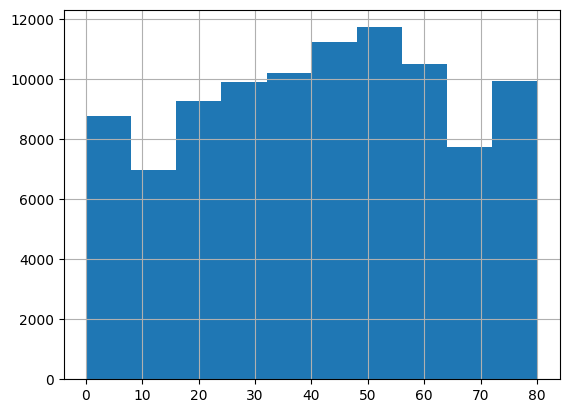

In [142]:
df['age'].hist()

In [143]:
df = df[df['age'].mod(1) == 0]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [144]:
## convert age column datatype to int
df['age'] = df['age'].astype(int)
df.head()

<ipython-input-144-247222d4e6e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94133 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               94133 non-null  int64  
 1   age                  94133 non-null  int64  
 2   hypertension         94133 non-null  int64  
 3   heart_disease        94133 non-null  int64  
 4   smoking_history      94133 non-null  int64  
 5   bmi                  94133 non-null  float64
 6   HbA1c_level          94133 non-null  float64
 7   blood_glucose_level  94133 non-null  int64  
 8   diabetes             94133 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 MB


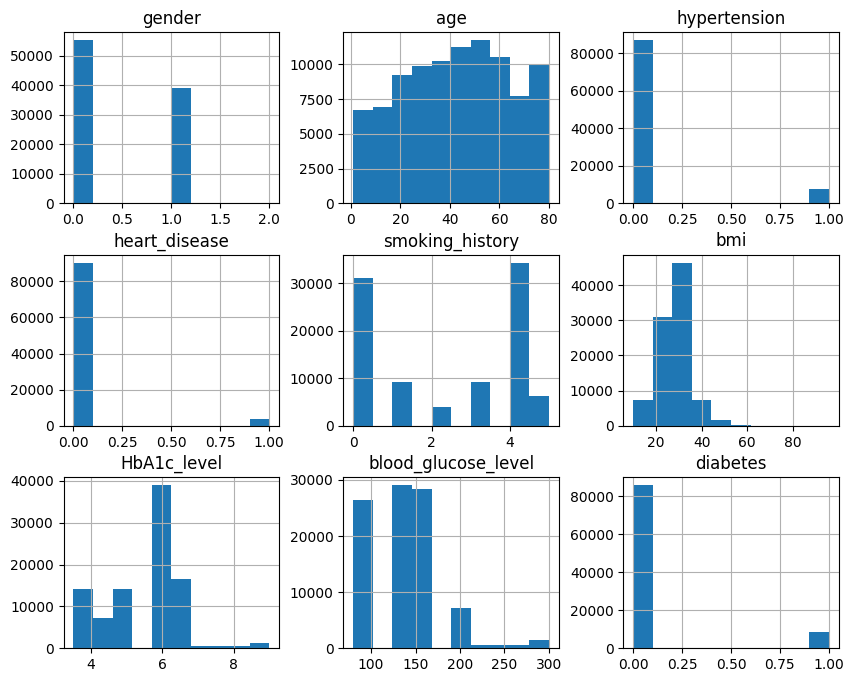

In [146]:
df.hist(bins=10, figsize=(10,8))
plt.show()

In [147]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [149]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

In [150]:
X_train

array([[-0.83853458,  1.38484081,  3.39070007, ...,  1.97919104,
         0.62008453,  0.16280136],
       [ 1.19060055, -0.57883363, -0.29492435, ..., -0.02944675,
         0.43363542,  0.50439775],
       [ 1.19060055,  0.19750278, -0.29492435, ...,  0.02738738,
         0.89975819,  0.40679878],
       ...,
       [ 1.19060055,  0.6998381 , -0.29492435, ...,  0.16199453,
        -0.49861011, -0.20319478],
       [-0.83853458,  0.74550494,  3.39070007, ..., -1.04797417,
         0.24718632,  0.16280136],
       [-0.83853458, -0.167832  , -0.29492435, ...,  5.88728527,
         0.89975819, -0.30079375]])

In [151]:
X_test

array([[ 1.19060055,  0.6085044 , -0.29492435, ...,  0.38035724,
         0.15396176, -0.93518704],
       [-0.83853458, -0.167832  , -0.29492435, ..., -0.97618369,
        -0.49861011,  1.50478718],
       [-0.83853458,  1.15650657, -0.29492435, ..., -0.02944675,
        -0.68505922,  0.04080264],
       ...,
       [ 1.19060055, -0.98983525, -0.29492435, ..., -0.40933803,
        -0.49861011,  0.50439775],
       [-0.83853458, -0.80716786, -0.29492435, ...,  1.17902632,
         0.43363542, -0.93518704],
       [ 1.19060055, -1.26383634, -0.29492435, ..., -0.91785393,
         0.24718632, -0.20319478]])

In [152]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) 
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [153]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [125]:
%%time
ann.fit(X_train, y_train, batch_size=32, epochs = 100)

Epoch 1/100
2354/2354 [==============================] - 7s 2ms/step - loss: 0.1629 - accuracy: 0.9473
Epoch 2/100
2354/2354 [==============================] - 4s 2ms/step - loss: 0.1215 - accuracy: 0.9570
Epoch 3/100
2354/2354 [==============================] - 4s 2ms/step - loss: 0.1189 - accuracy: 0.9575
Epoch 4/100
2354/2354 [==============================] - 5s 2ms/step - loss: 0.1172 - accuracy: 0.9580
Epoch 5/100
2354/2354 [==============================] - 4s 2ms/step - loss: 0.1155 - accuracy: 0.9585
Epoch 6/100
2354/2354 [==============================] - 4s 2ms/step - loss: 0.1137 - accuracy: 0.9586
Epoch 7/100
2354/2354 [==============================] - 5s 2ms/step - loss: 0.1126 - accuracy: 0.9588
Epoch 8/100
2354/2354 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9588
Epoch 9/100
2354/2354 [==============================] - 4s 2ms/step - loss: 0.1111 - accuracy: 0.9587
Epoch 10/100
2354/2354 [==============================] - 5s 2ms/step - l

In [126]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)

589/589 [==============================] - 2s 2ms/step


In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[17076     1]
 [  566  1184]]
0.9698836776969246


In [128]:
## First, Apply feature scaling to this data
## Second, Now predict value using our winning model randonforestclassifier
person_X = stand.transform([[1,23.0, 0,0,0,22.9,5.4, 108]])
person_X

array([[ 1.19060055, -0.89850156, -0.29492435, -0.20928467, -1.2153178 ,
        -0.69051741, -0.1257119 , -0.73998911]])

In [129]:
person_predict = ann.predict(person_X)
person_predict = (person_predict>0.5)
person_predict

1/1 [==============================] - 0s 33ms/step


array([[False]])